# Determing whether Covid-19 has an impact on U.S. real-estate marketing
#### by Shelton (Xiangzhong) Zhou

As you know, COVID-19 is a virus characterized as a global epidemic by the World Health Organization (WHO). This virus has a fast transmission rate that allows it to affect a large population of people in each country. Besides its fast transmission, it also created a lot of negative impact to scoiety including:
 - Quaratine
 - Closed of Business
 - Job loss
 - Country GDP Drop due to economic inactivity
 - and more that can be found [here](https://www.cbpp.org/research/poverty-and-inequality/tracking-the-covid-19-economys-effects-on-food-housing-and)

As a result, it has draw my attention into this project- will Covid-19 impact on housing marketing? </br> </br>
Due to many economic losses mentioned above, in my opinion, Covid-19 case or death number will have strong correlation with the listing and sold housing prices. </br> </br>
In this tutorial, I will take data from the WHO on the daily COVID cases in the US and get data from Zillow on the monthly real estate listing and sold median prices in the U.S. Then I will examine the correlation between these two data and see if there’s a strong, weak, or none relationship. 

## 1. Data Scrapping and Tidying Data

The first step is to import these environemnt because we will use them for creating DataFrame, graphing, and more. They are pre-written, so just import them and use them will make everything easier and happier


In [93]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt 

##### 1.1 - Zillow Data Scrapping and Tidying

To start, we are going to get Zillow's data through the links below at the top 2 lines of code. These data will give us U.S. and big cities' monthly median sold price and lising price of housing. However, the data is disorganized. So we need to fix it by tidying the data. The only useful row we will use is the first row because it has the average housing price up there arleady. If you are interested in looking at different cities' data, you can increase the `nrows` parameter. The reason of using it is because the data is to large to be looking at once, so we need to find the sections we want and scrap it out. Then we will see the `months` are the column names in this dataset, but we want to reorienate it to make it into rows. 

In [94]:
saleHouse = pd.read_csv('https://raw.githubusercontent.com/sz-zxz/CMSC320-Final-Project/main/Metro_median_sale_price_uc_sfrcondo_month.csv', nrows = 1)
listHouse = pd.read_csv('https://raw.githubusercontent.com/sz-zxz/CMSC320-Final-Project/main/Metro_mlp_uc_sfrcondo_sm_month.csv', nrows = 1)

saleHouse

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,102001,0,United States,country,NaN,180000.0,185000.0,185000.0,187000.0,193000.0,...,320000.0,330000.0,345000.0,360000.0,365000.0,365000.0,355000.0,349000.0,341500.0,335000.0


In [95]:
tempMonths = listHouse.columns
tempMonths2 = saleHouse.columns
months = []
salePrice = []
listPrice = []
i = 27
j = 148

while i < len(tempMonths) and j < len(tempMonths2):
    
    # Tidying the month into year-month format
    year = tempMonths[i].split('-')[0]
    month = tempMonths[i].split('-')[1]
    months.append(year + '-' + month)

    # getting the amount of value of the month
    salePrice.append(saleHouse[tempMonths[i]][0])
    listPrice.append(listHouse[tempMonths2[j]][0])
    
    i += 1
    j += 1

marketPrice = pd.DataFrame(data = {'Year-Month' : months, 'Median Listing Price' : listPrice, 'Median Sold Price' : salePrice})
marketPrice.index = range(1, 35)
marketPrice

,Year-Month,Median Listing Price,Median Sold Price
1,2020-01,286600.0,247900.0
2,2020-02,286633.0,250000.0
3,2020-03,291300.0,259950.0
4,2020-04,296300.0,260000.0
5,2020-05,301300.0,256000.0
6,2020-06,306633.0,265000.0
7,2020-07,313300.0,278000.0
8,2020-08,317967.0,280000.0
9,2020-09,319300.0,283000.0
10,2020-10,318967.0,285000.0


After obtaining the monthly real estate data from Zillow, this is how it looks like- nice and neat.

#### 1.1.1 - graphing Zillow Data

After cleaning up the data, I graphed a bar graph that compares the monthly listing price and sold price in the US. While examining the bar graph, I noticed something interesting. In most months, there’s a big difference between the listing and selling prices- The listing price is far greater than the sold price. But I noticed there are three months, February to April, where the sold price is very close to the listing price. This could indicate that something happened during this time that caused the sold price to be close to the listing price. We will see after we obtain data in the next section.

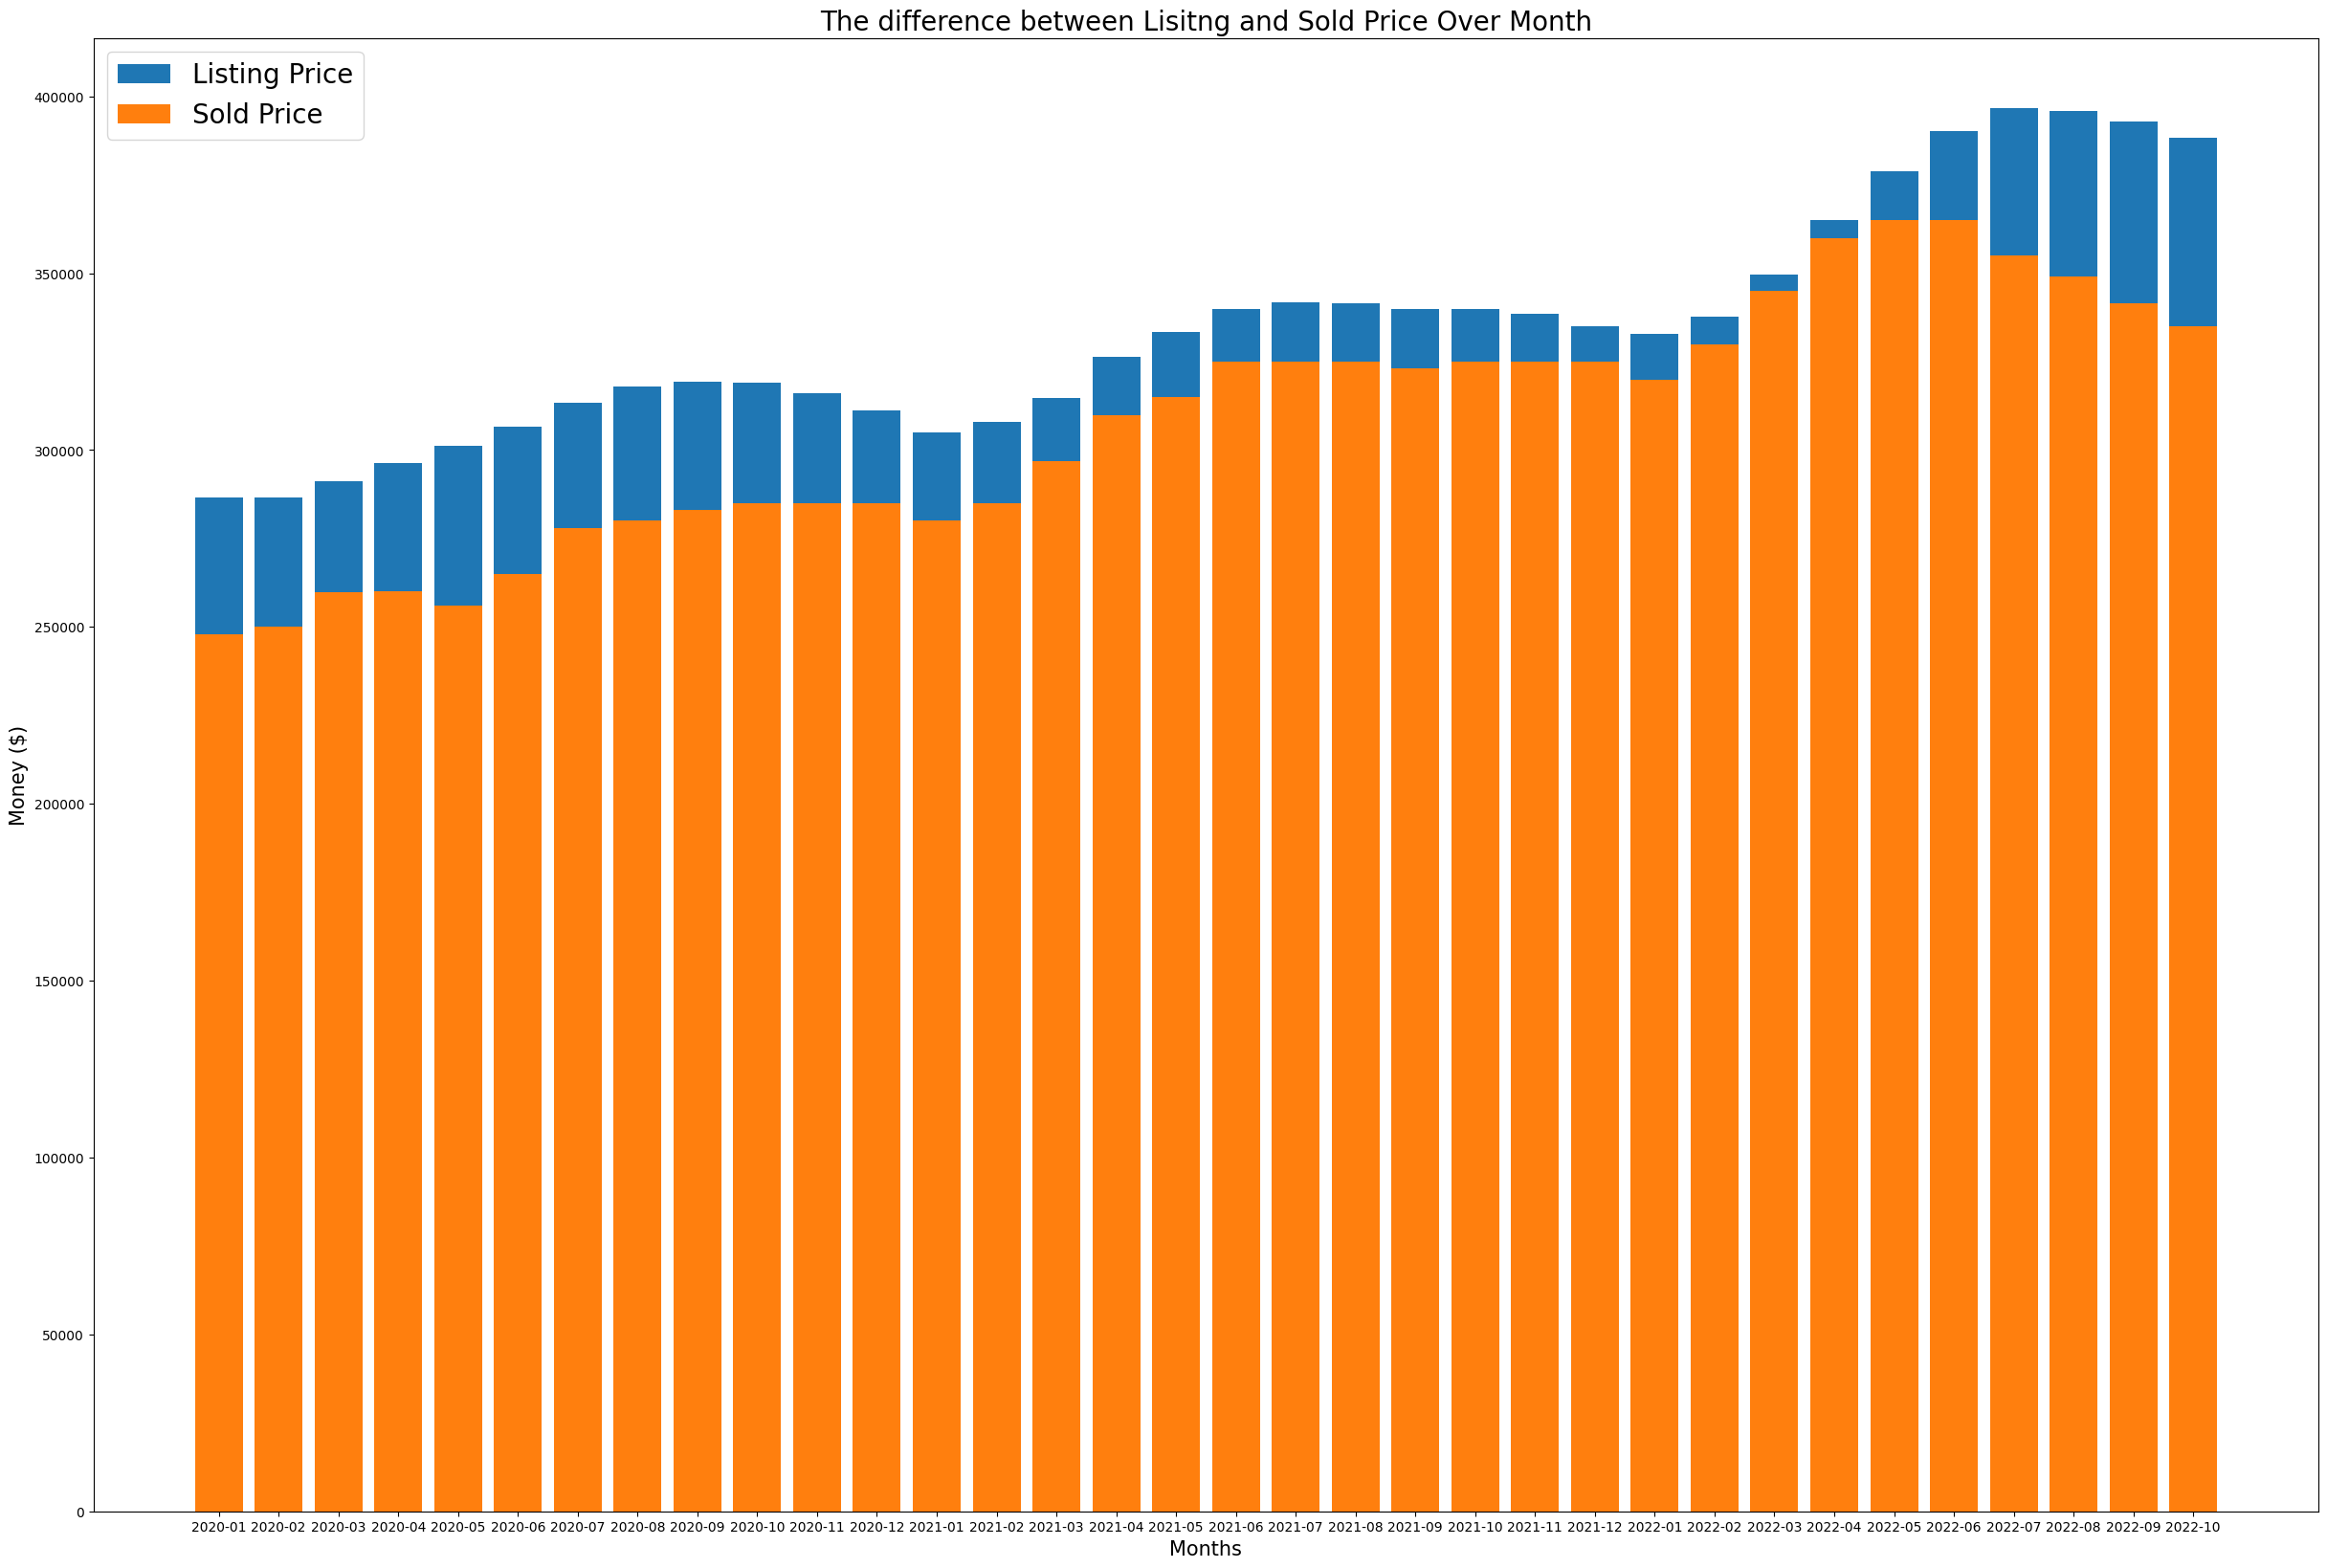

In [96]:
plt.figure(figsize = (30,20))

plt.xlabel("Months", fontsize=15)
plt.ylabel("Money ($)", fontsize=15)
plt.title('The difference between Lisitng and Sold Price Over Month', fontsize=20)

plt.bar(marketPrice['Year-Month'], marketPrice['Median Listing Price'], label = 'Listing Price')
plt.bar(marketPrice['Year-Month'], marketPrice['Median Sold Price'], label = 'Sold Price')
plt.legend(loc = 'upper left', prop={'size': 20})


#### 1.2 - Covid Data Scrapping and Tidying

After getting the real-estate information, we are moving on to the next phase- getting Covid data from [WHO website](https://www.who.int). This data will give us the number of reported new cases and death cases everyday. It also has cumulative cases and deaths, but we will not be looking at. So, we have to do minimal tidying here to get rid off datas that are not needed. This data is also very large, but the format does not allow us to use `nrows`, so we have to use a new technique- `chunksize`. You can find how chunking work [here](https://towardsdatascience.com/loading-large-datasets-in-pandas-11bdddd36f7b). 

In [97]:
# Getting Data from WHO
covidDaily = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv', chunksize = 1000)
covidDaily


In [98]:
# append each chunk df here 
chunkList = []

# Each chunk is in dataframe format
index = 0
for chunk in covidDaily:

    # look through row in chunk and drop row of data that is not America
    for i in chunk.index:
        if index == 1000:
            index = 0
        if chunk["Country"][i] != 'United States of America':
            chunk = chunk.drop([i])
        else:
            index = index + 1

    # Once the data filtering is done, append the chunk to list
    chunkList.append(chunk)

# concat all the chunks in list into one dataframe 
covidDaily = pd.concat(chunkList)


# drop the unused columns
covidDaily = covidDaily.drop(['Country_code', 'WHO_region', 'Cumulative_deaths', 'Cumulative_cases', 'Country'], axis = 1)

# change the name of the columns
covidDaily = covidDaily.rename(columns = {'Date_reported': 'Date', 'New_cases': 'New Cases', 'New_deaths': 'New Deaths'})

covidDaily

,Date,New Cases,New Deaths
243854,2020-01-03,0,0
243855,2020-01-04,0,0
243856,2020-01-05,0,0
243857,2020-01-06,0,0
243858,2020-01-07,0,0
...,...,...,...
244928,2022-12-12,0,0
244929,2022-12-13,0,0
244930,2022-12-14,0,0
244931,2022-12-15,0,0


This is the data we get, but it has 1079 rows. It is too large to look and compare data at, so the best thing to do is to merge them into monthly instead of daily report. It will be eaiser for us to compare data with the housing data from zillow because they are by monthly. To do so, we will need to break up the `year` and `month`, then iterate through the data to find the data correspond to the month. We will have to get rid of the last 2 month of data because our data in zillow only have up to 2022-10. 

In [99]:
# tidying COVID data

currMonth = "01"
currYear = "2020"
newCaseSum = 0
newDeathsSum = 0
newCases = []
newDeaths = []

# combine all the data in each day of the month into one row of data
for index, row in covidDaily.iterrows():

    # getting the year and month number
    year = row['Date'].split('-')[0]
    month = row['Date'].split('-')[1]

    # if the new row month is equal to the current month add the cases, new death, and total death together
    if month == currMonth:
        newCaseSum += covidDaily.at[index, 'New Cases']
        newDeathsSum += covidDaily.at[index, 'New Deaths']

    # when finish adding one month's data, add to dataTable2, update month and year, and reset death sum
    else:
        newCases.append(newCaseSum)
        newDeaths.append(newDeathsSum)
        currMonth = month
        currYear = year
        newDeathsSum = 0
        newCaseSum = 0

# add the last row of data to dataTable2
newCases.pop(len(newCases) - 1)
newDeaths.pop(len(newDeaths) - 1)

covidData = pd.DataFrame({'Year-Month' : months, 'New Cases' : newCases, 'New Deaths' : newDeaths})

# change the range of the index 
covidData.index = range(1, 35)
covidData

,Year-Month,New Cases,New Deaths
1,2020-01,8,0
2,2020-02,61,1
3,2020-03,173070,3326
4,2020-04,841627,56503
5,2020-05,728342,42447
6,2020-06,797064,22019
7,2020-07,1845711,28256
8,2020-08,1458397,30431
9,2020-09,1165070,20644
10,2020-10,1776676,22653


After obtaining the monthly Covid-19 cases in the US from WHO, I stored them in a data frame and cleaned up the data. The result is above.

#### 1.2.1 - Graphing the Covid-19 Data

Here I graphed three graphs; one shows the new cases over months, one shows the death counts over months, and the last one is the combination of the new cases and death counts over months. I have individual graphs for new cases and deaths because the difference between new cases and death are too great. The third graph shows that the death count data is too small compared to the new cases. Therefore, the death count data is just a straight line when shown on the graph. 

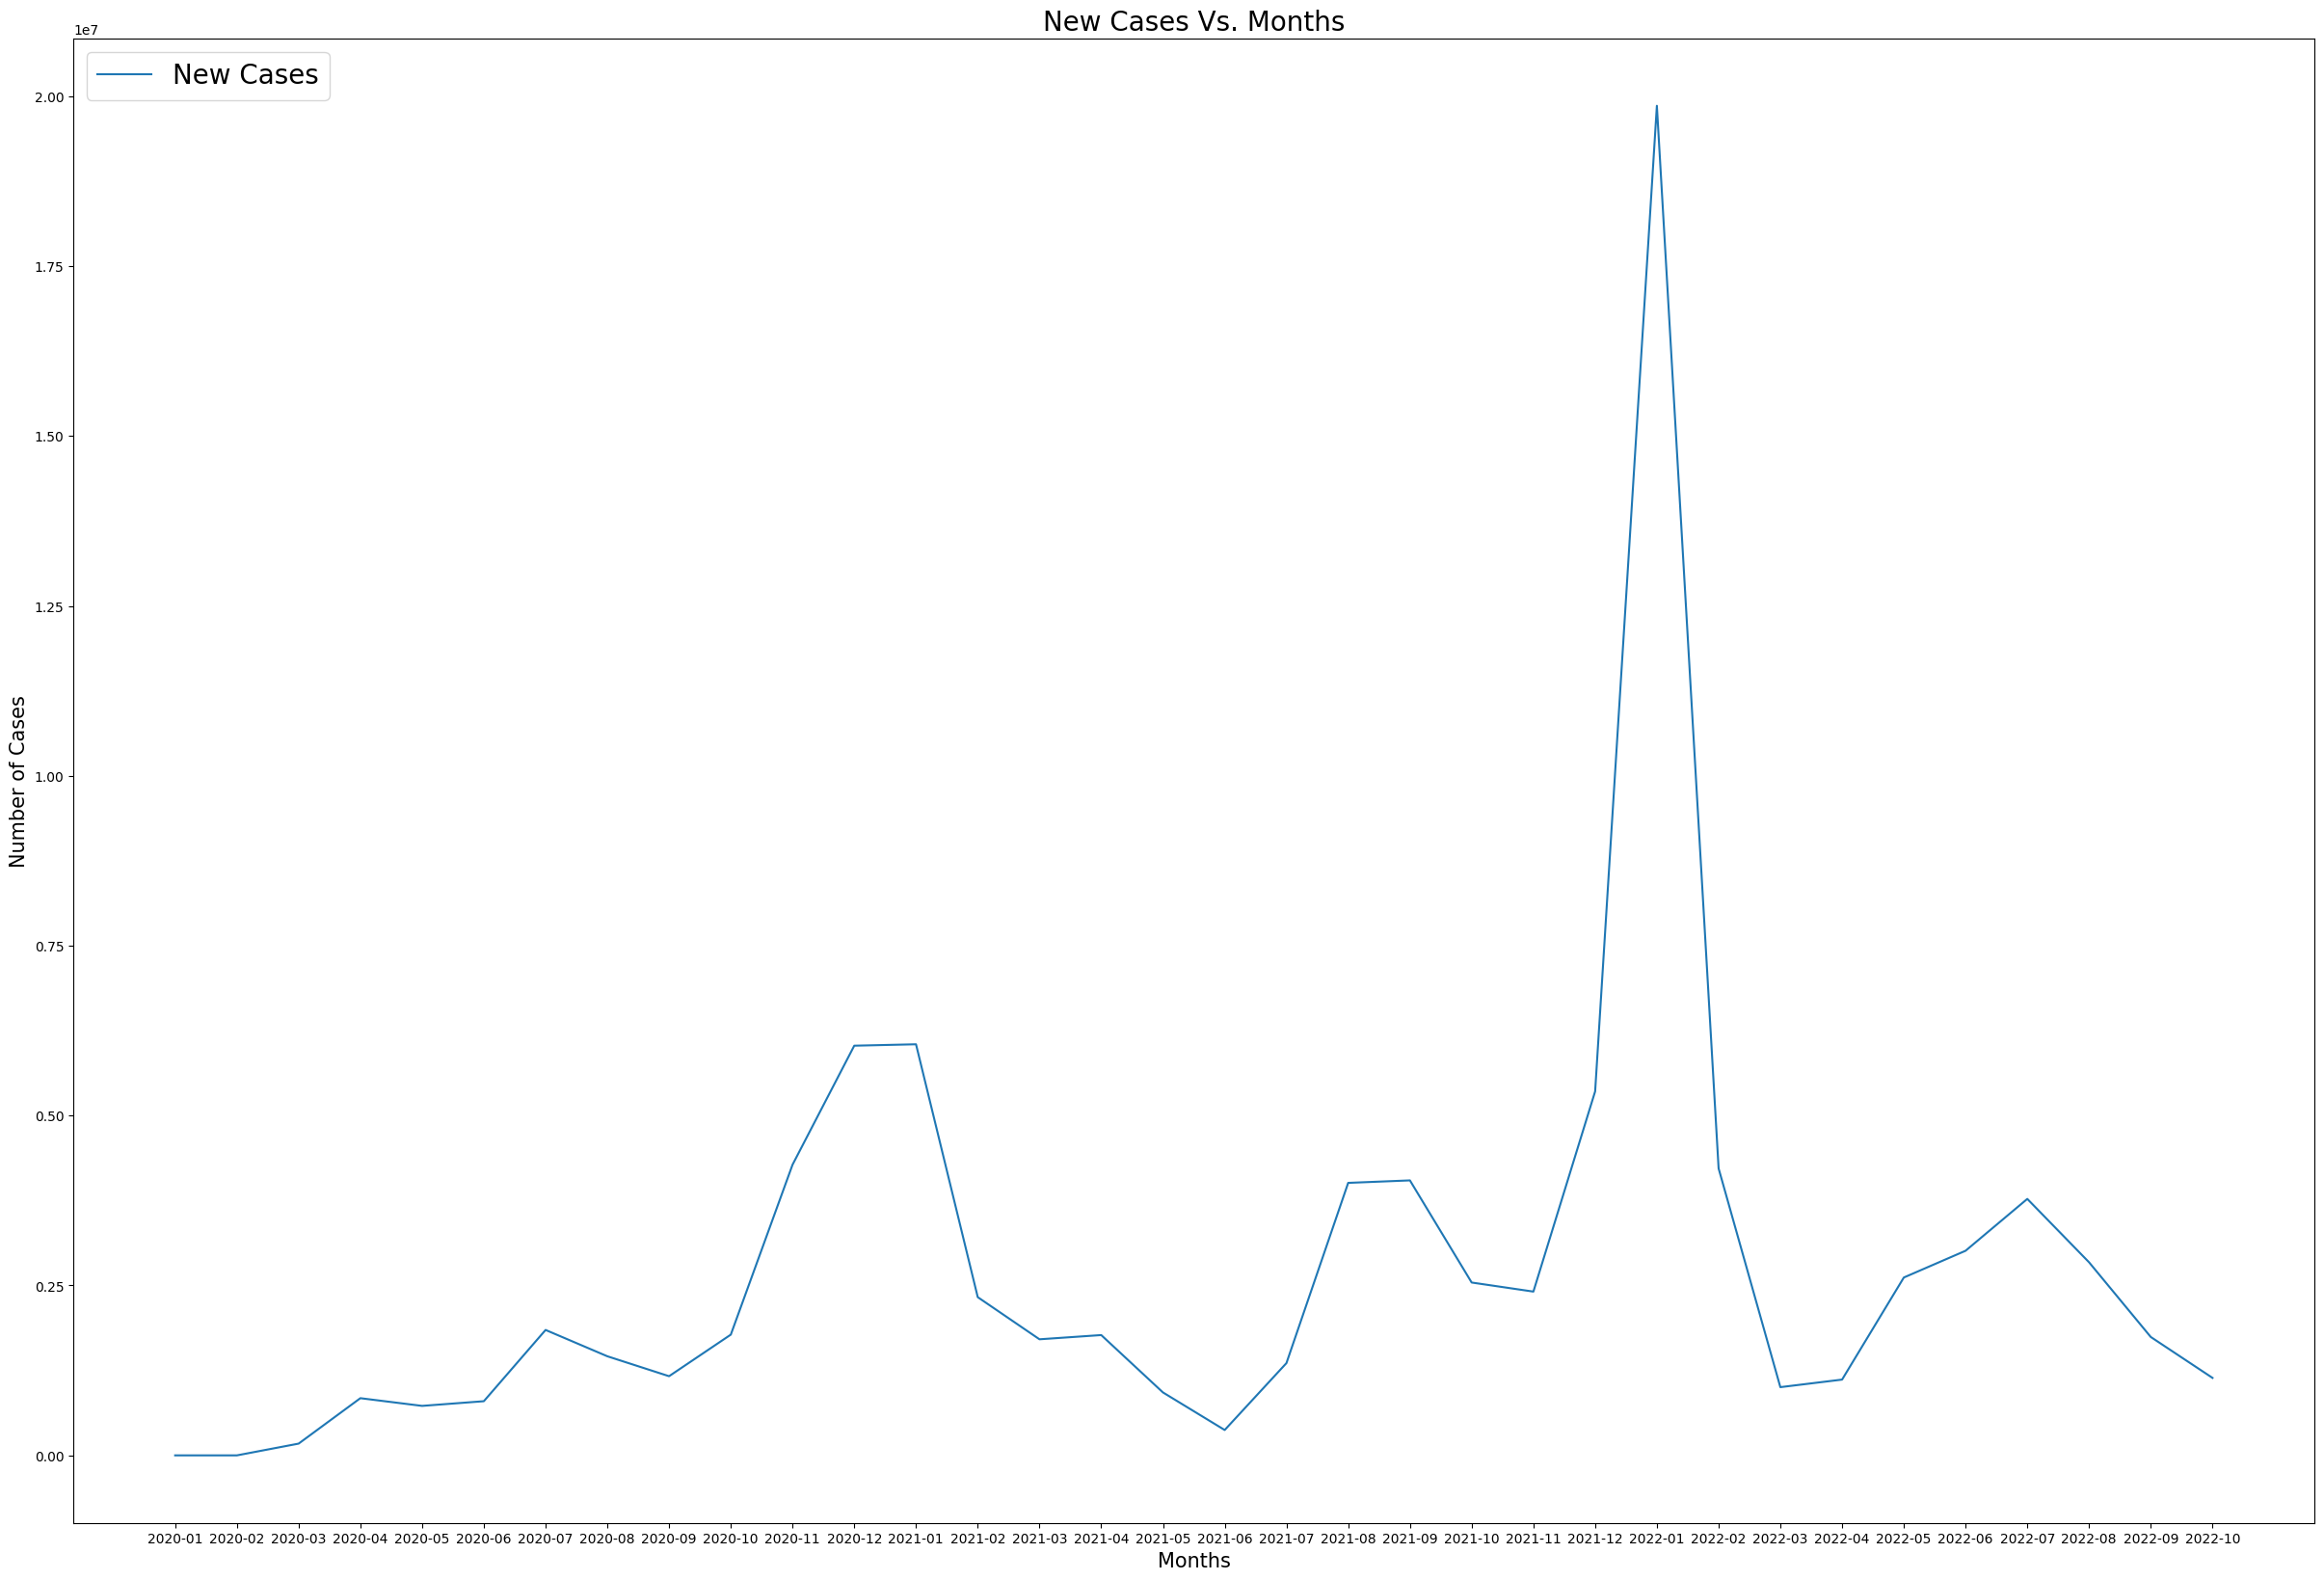

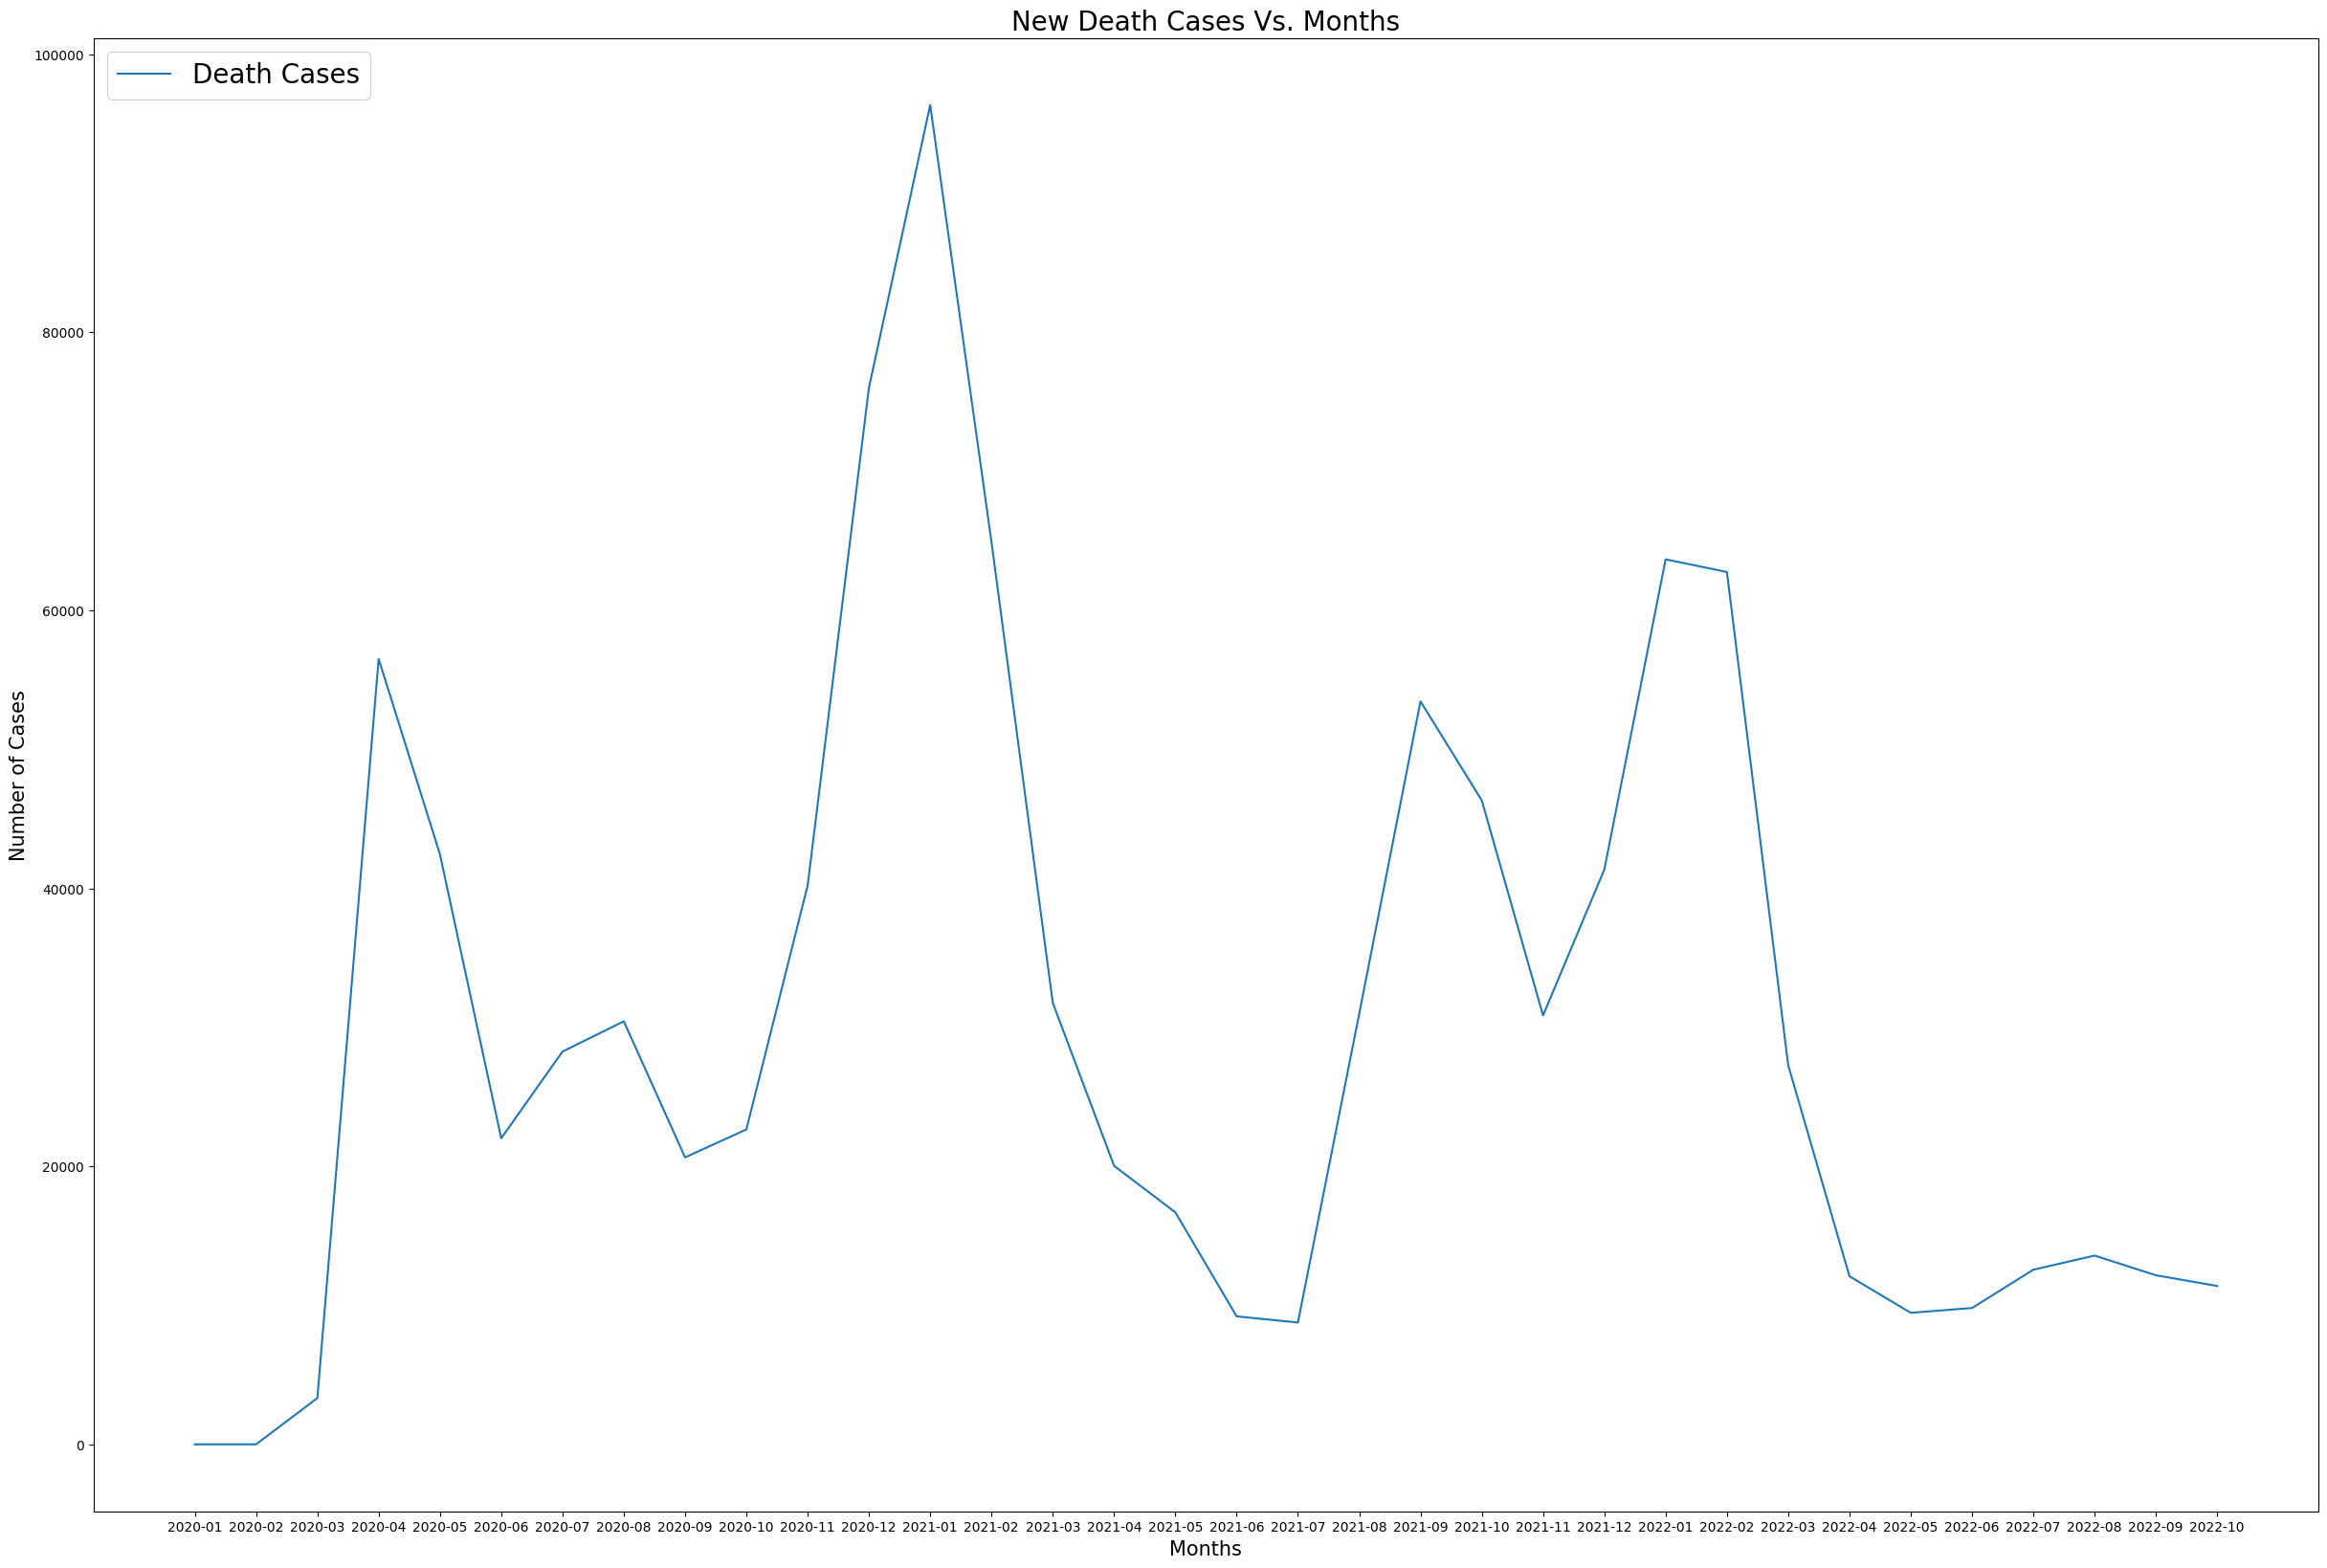

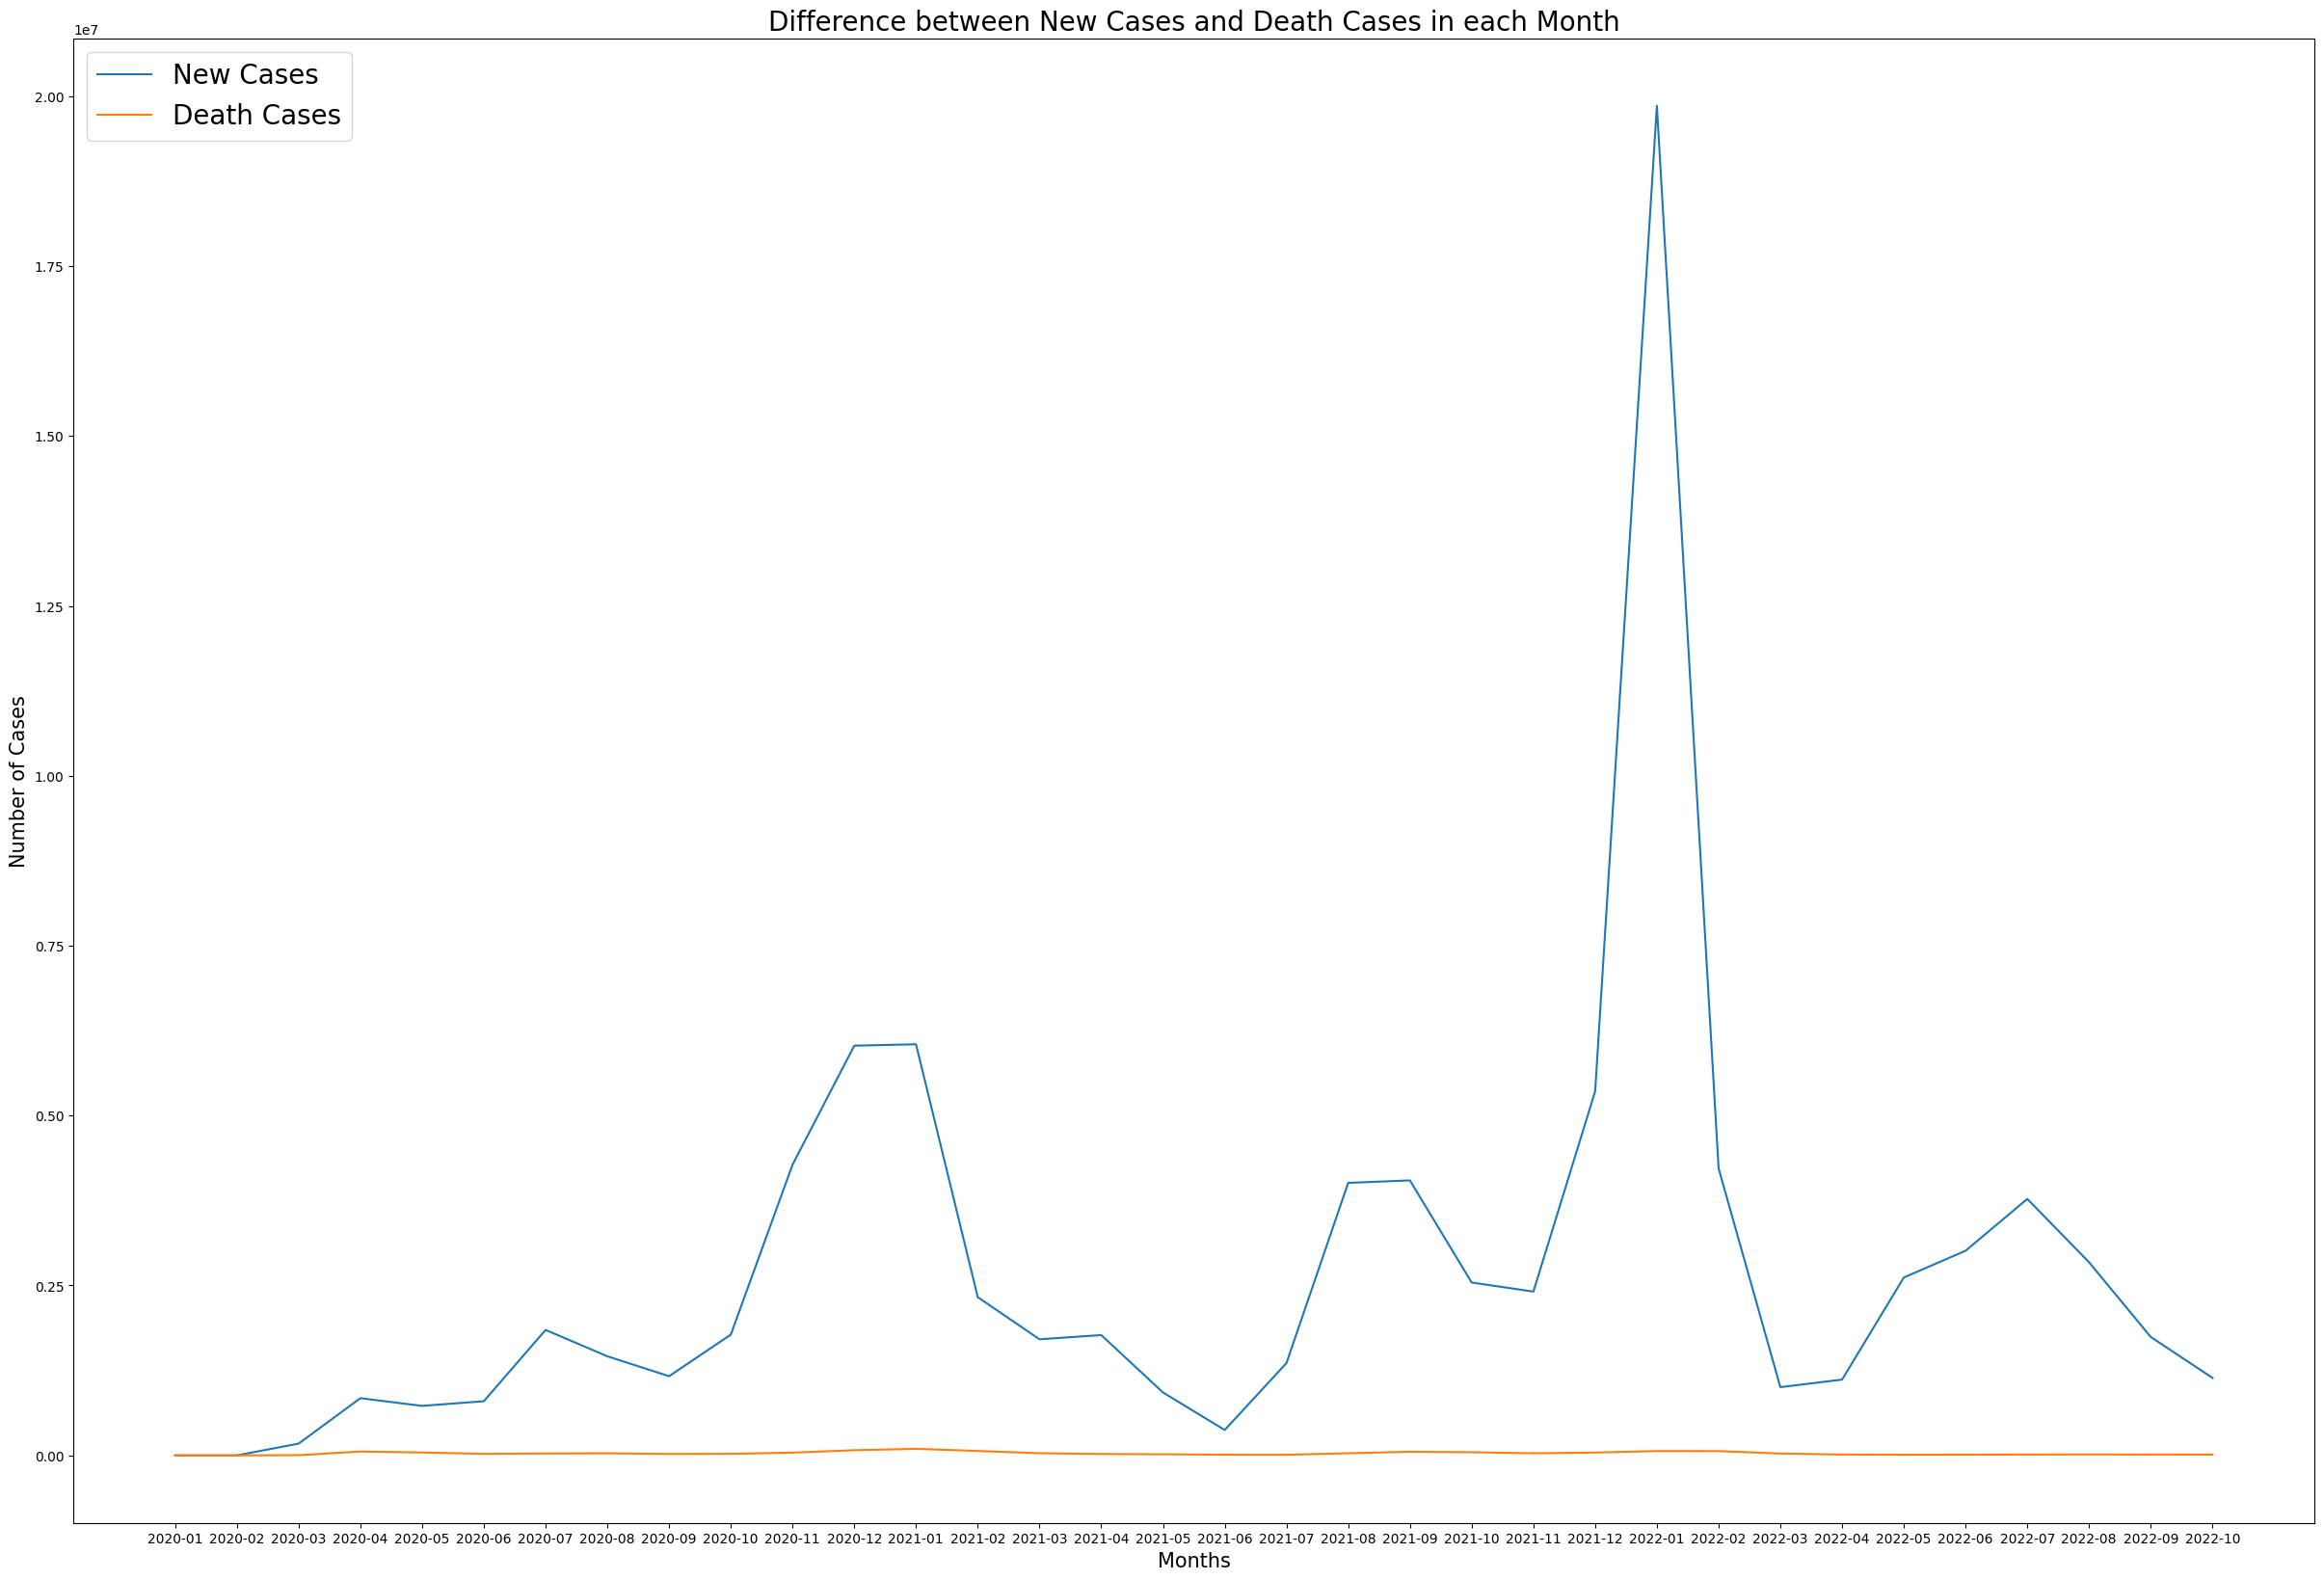

In [100]:
plt.figure(figsize = (30,20))
plt.xlabel("Months", fontsize=15)
plt.ylabel("Number of Cases", fontsize=15)
plt.title('New Cases Vs. Months', fontsize=20)

plt.plot(covidData['Year-Month'], covidData['New Cases'], label = 'New Cases')
plt.legend(loc = 'upper left', prop={'size': 20})


plt.figure(figsize = (30,20))
plt.xlabel("Months", fontsize=15)
plt.ylabel("Number of Cases", fontsize=15)
plt.title('New Death Cases Vs. Months', fontsize=20)

plt.plot(covidData['Year-Month'], covidData['New Deaths'], label = 'Death Cases')
plt.legend(loc = 'upper left', prop={'size': 20})

plt.figure(figsize = (30,20))
plt.xlabel("Months", fontsize=15)
plt.ylabel("Number of Cases", fontsize=15)
plt.title('Difference between New Cases and Death Cases in each Month', fontsize=20)

plt.plot(covidData['Year-Month'], covidData['New Cases'], label = 'New Cases')
plt.plot(covidData['Year-Month'], covidData['New Deaths'], label = 'Death Cases')
plt.legend(loc = 'upper left', prop={'size': 20})

Although they are garphed, it is very hard to see the correlations between these event, but it's ok, becuase we are focusing on case number and death number individually with the sold price of the houses. We choose sold price instead of listing because sold prices are the actual counts toward the markets while listing price are "fake" numbers that are not likely to become the actual house value. So let's move to the next section of finding the correlation and relaitonship.

## 2. Correlation

To better compare our data and back up our hypothesis, we perform a linear regression. This will give us a line of best fit among all of the datas in the graph. Before drawing the line, we will have to first find the ratio differences between each data because they all have different quantity. We will apply the slope function every month and compare the real-estate data with covide data to see which fits the most. In this way, our hypothetical best line will be at x = 0. 

slope of the line of best fit is  0.0006983584668899233 


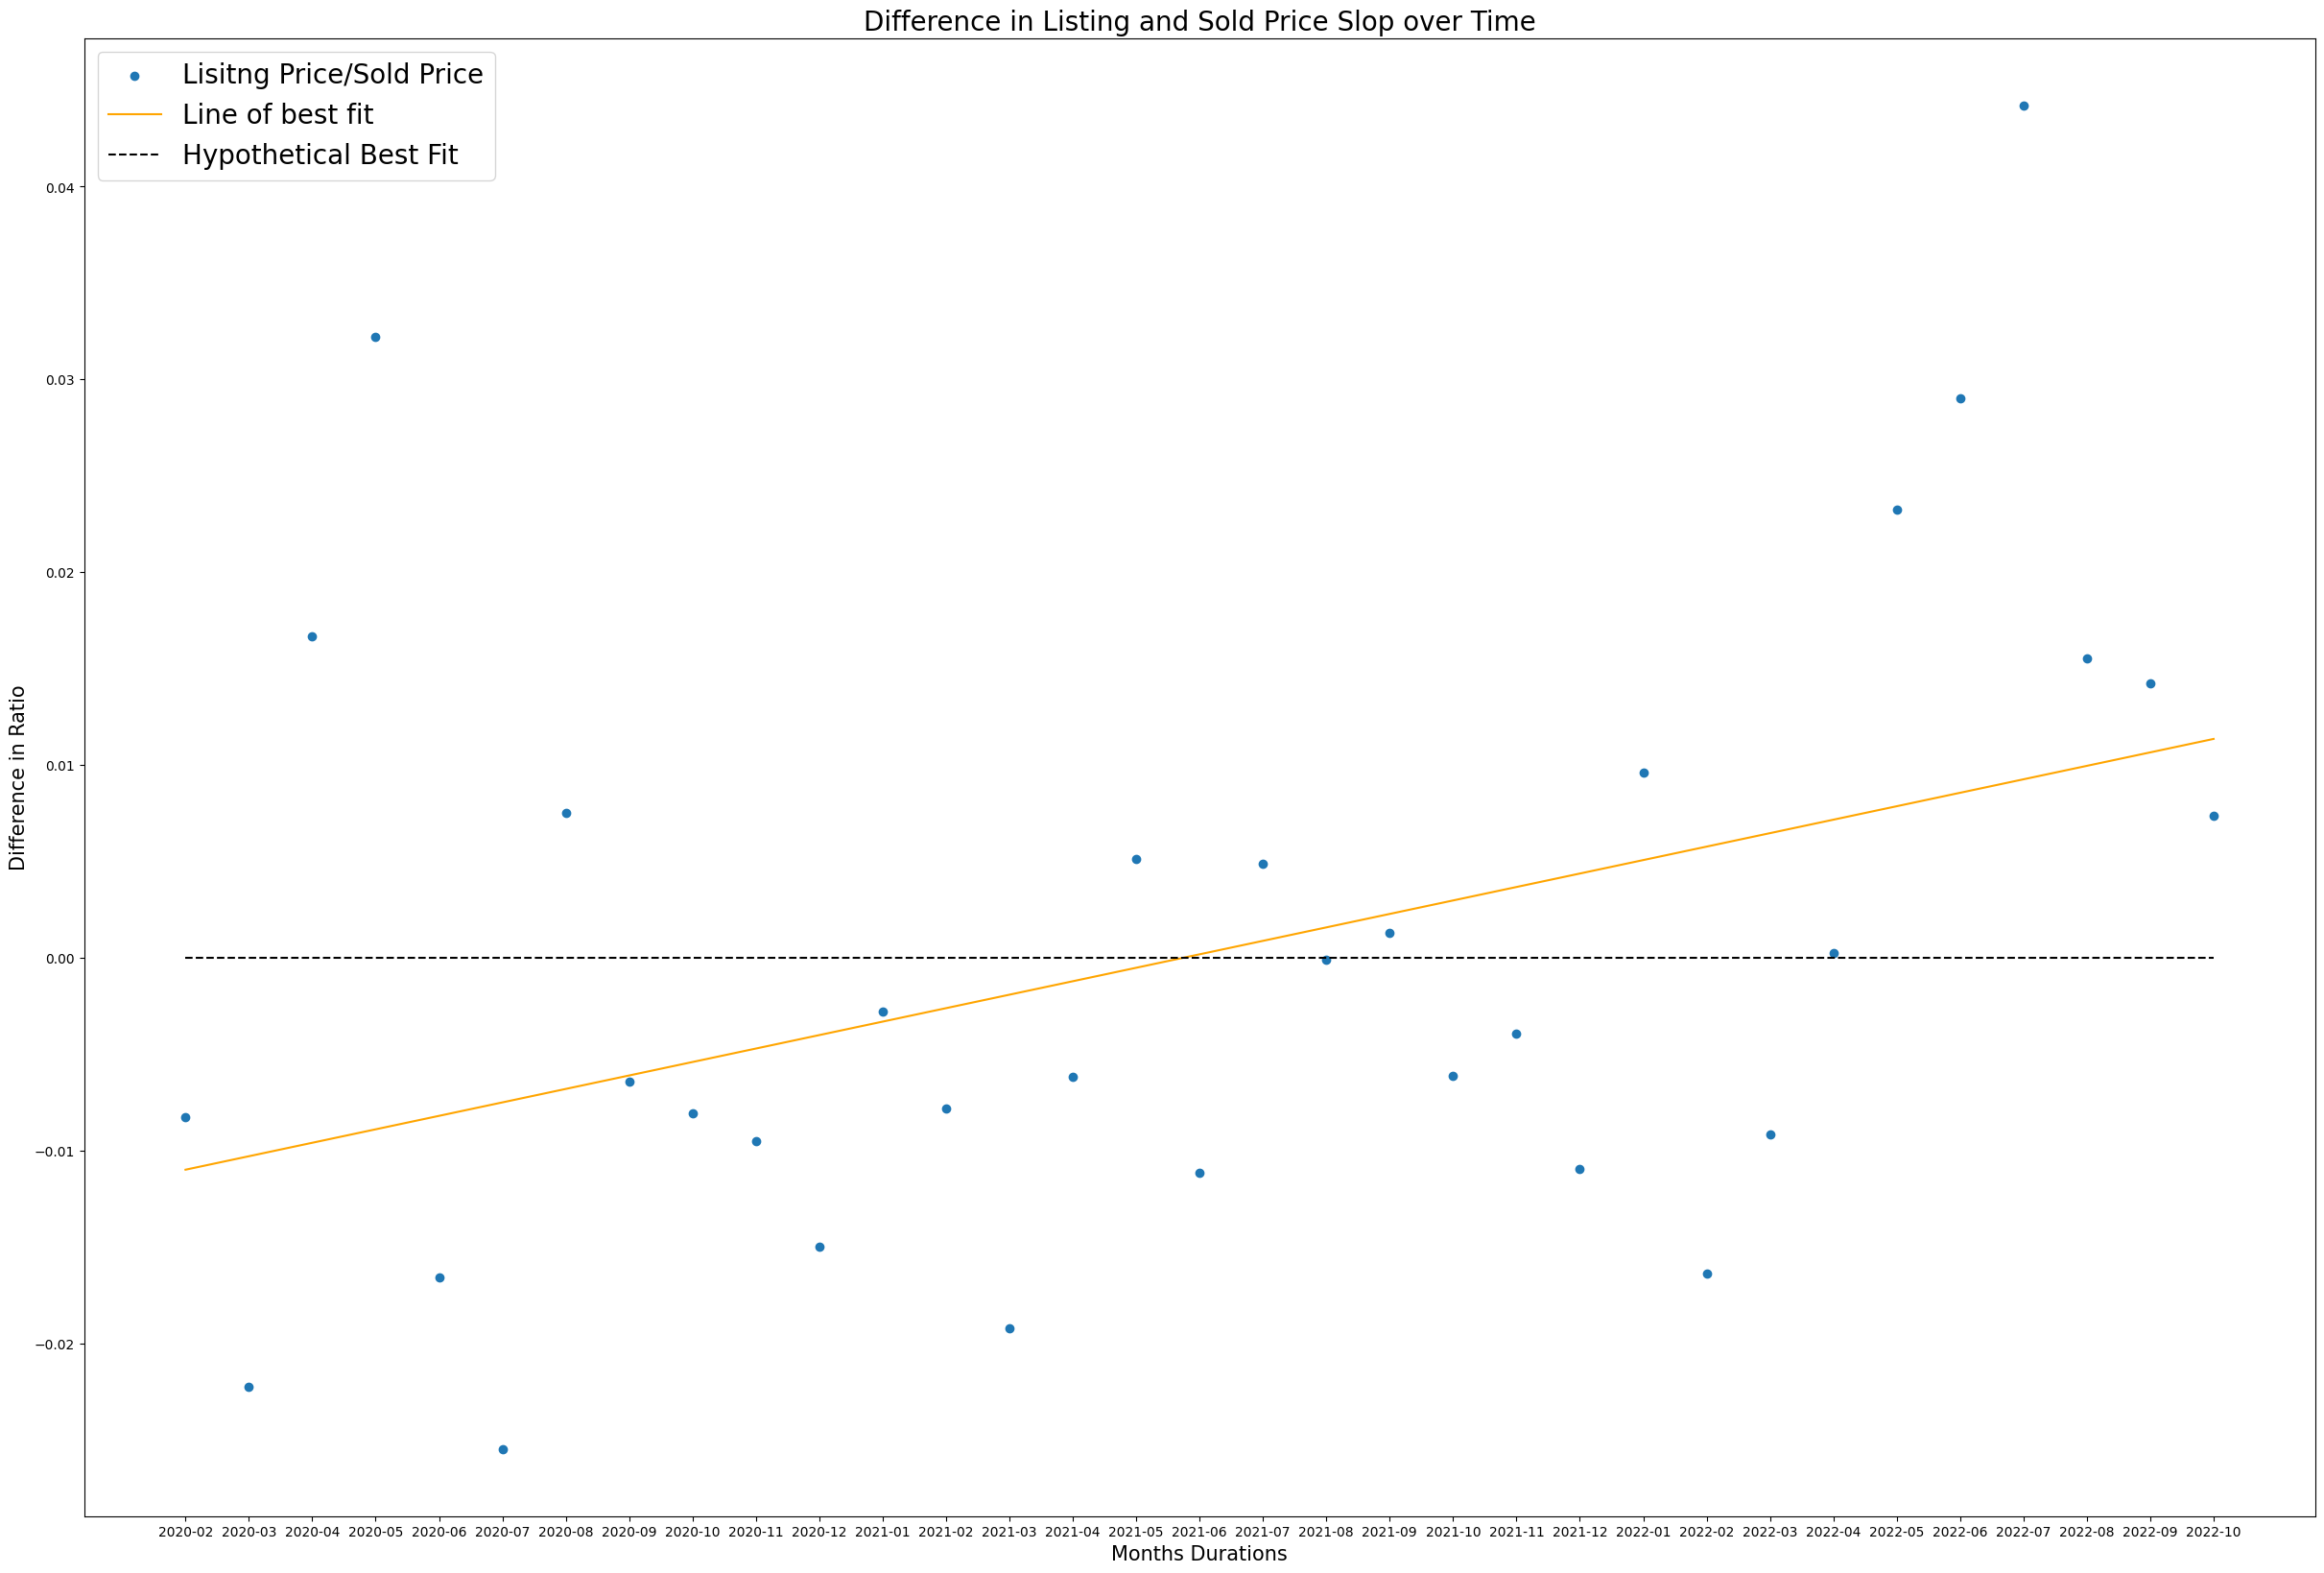

In [101]:
listRatio = []
saleRatio = []
caseRatio = []
deathRatio = []

tempList = 0
tempSale = 0

for idx, row in marketPrice.iterrows():
    if tempList == 0:
        tempList = row['Median Listing Price']
        tempSale = row['Median Sold Price']
    else :
        lRatio = (row['Median Listing Price'] - tempList) / row['Median Listing Price']
        sRatio = (row['Median Sold Price'] - tempSale) / row['Median Sold Price']
        listRatio.append(lRatio)
        saleRatio.append(sRatio)
        tempList = row['Median Listing Price']
        tempSale = row['Median Sold Price']

listSaleRatio = []
index = []

i = 0

while i < len(listRatio):
    listSaleRatio.append(listRatio[i] - saleRatio[i])
    i += 1
    index.append(i)

m1, b1 = np.polyfit(index, listSaleRatio, 1)

months.pop(0)

plt.figure(figsize = (30,20))
plt.xlabel("Months Durations", fontsize=15)
plt.ylabel("Difference in Ratio", fontsize=15)
plt.title('Difference in Listing and Sold Price Slop over Time', fontsize=20)

plt.scatter(months, listSaleRatio, label = 'Lisitng Price/Sold Price')
plt.plot(months, np.multiply(m1, index) + b1, label = 'Line of best fit', color='orange')
plt.plot(months, np.multiply(0, index), '--', color = 'black', label = 'Hypothetical Best Fit')
plt.legend(loc = 'upper left', prop={'size': 20})

print('slope of the line of best fit is ', m1, '')


From this graph, we found out that listing price and final sold price are actually extremly close to each other with very strong correlation. The slop of line of best fit is 0.0007 and also tight up around with the hypothetical best line of best fit.
</br>
</br>
Now I will start to examine the correlation between COVID data with the real estate data by graphing them together in one graph. It doesn't matter whether it is correlate to sold price or listing price of the housing anymore because they are tight together. We will still do it towards the sold price because it is more meaningful in definition of real-estate marketing.


slope of the line of best fit for Case/Sold price is  0.03351249870036897 
slope of the line of best fit for Death/Sold price is  0.01646306519026976 


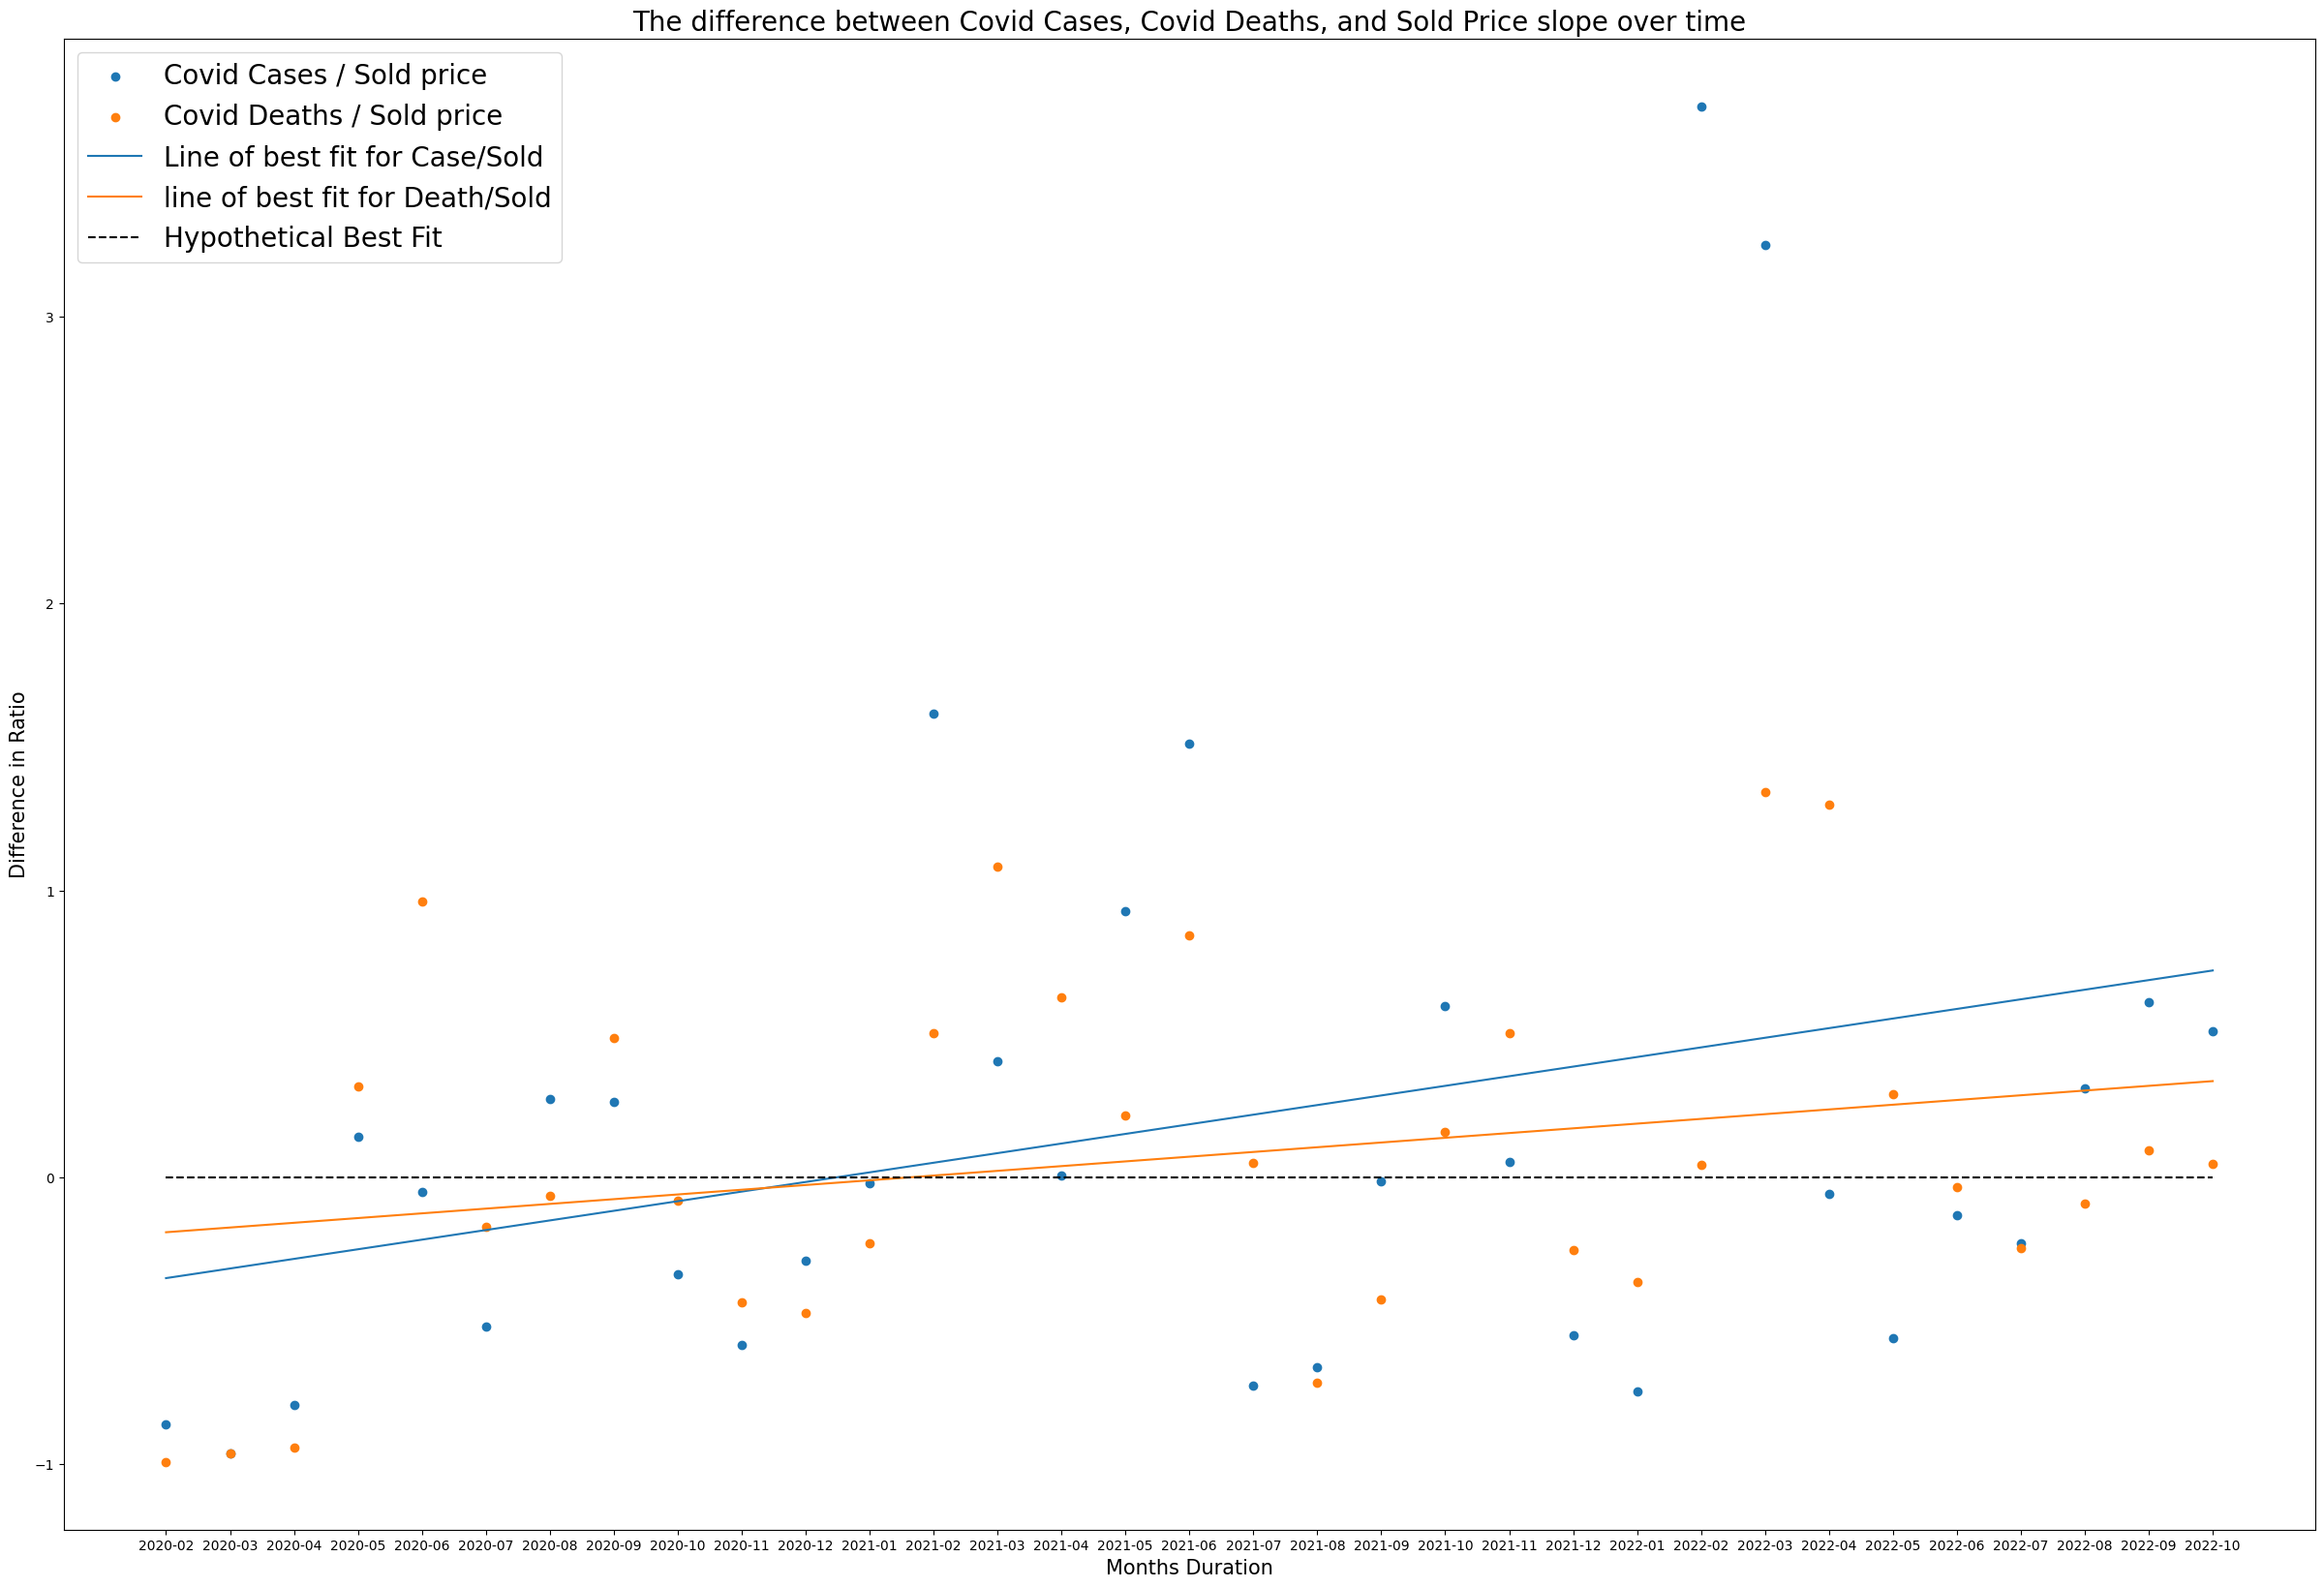

In [102]:
tempCase = 0
tempDeath = 0

for idx, row in covidData.iterrows():
    if tempCase == 0:
        tempCase = row['New Cases']
        tempDeath = row['New Deaths']
    else :
        cRatio = (row['New Cases'] - tempCase) / row['New Cases']
        dRatio = (row['New Deaths'] - tempDeath) / row['New Deaths']
        caseRatio.append(cRatio)
        deathRatio.append(dRatio)
        tempCase = row['New Cases']
        tempDeath = row['New Deaths']

saleCaseRatio = []
saleDeathRatio = []
index = []

i = 0

while i < len(caseRatio):
    saleCaseRatio.append(saleRatio[i] - caseRatio[i])
    saleDeathRatio.append(saleRatio[i] - deathRatio[i])
    i += 1
    index.append(i)

m1, b1 = np.polyfit(index, saleCaseRatio, 1)
m2, b2 = np.polyfit(index, saleDeathRatio, 1)


plt.figure(figsize = (30,20))
plt.xlabel("Months Duration", fontsize=15)
plt.ylabel("Difference in Ratio", fontsize=15)
plt.title('The difference between Covid Cases, Covid Deaths, and Sold Price slope over time', fontsize=20)

plt.scatter(months, saleCaseRatio, label = 'Covid Cases / Sold price')
plt.scatter(months, saleDeathRatio, label = 'Covid Deaths / Sold price')
plt.plot(months, np.multiply(m1, index) + b1, label = 'Line of best fit for Case/Sold')
plt.plot(months, np.multiply(m2, index) + b2, label = 'line of best fit for Death/Sold')
plt.plot(months, np.multiply(0, index), '--', color = 'black', label = 'Hypothetical Best Fit')
plt.legend(loc = 'upper left', prop={'size': 20})

print('slope of the line of best fit for Case/Sold price is ', m1, '')
print('slope of the line of best fit for Death/Sold price is ', m2, '')

There are some outliers in the graph like the two blue dots at the top right. Even though, the line of best fit for both is still pretty good. The realtionship between death and real-estate marketing is strong than the case numbers and real-estate marketing. They both have relatively low slope at 0.0335 and 0.01646. Since death case line of best fit is more close to our hypothetical best line, I will say that the amount of death cases of Covid-19 every month will have an impact to the housing market as the number changes comparing to the previous data.

## 3. Conclusion

As we can tell from the graph with line of best fit, we found that it is surprisingly close to our null hypothesis:
- Covid-19 has strong impact on real-estate marketing 

We have gone thorugh a standard data science pipeline. We identified our variable of interests and utilizing models to understand what factors most effect real-estate marketing's likelihood of raising or dropping. We have learned how to scrap data, tidying data, dealing data with large size with `nrows` and `chunking`, and analyzing them to build a storng evidence to back up our original statement.
</br>
</br>
Here are some reference list we used for data source and details about our topics
- Zillow Data : https://www.zillow.com/research/data/
- WHO Data : https://www.who.int
- Covid-19 effects : https://www.cbpp.org/research/poverty-and-inequality/tracking-the-covid-19-economys-effects-on-food-housing-and
- Chunking : https://towardsdatascience.com/loading-large-datasets-in-pandas-11bdddd36f7b
- linear Regression : https://www.ibm.com/topics/linear-regression